# Imports

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Clean and format data

## Read and drop duplicates

In [67]:
df = pd.read_csv(r'data\Encuesta de Recursos para Cluster Spark – PPC.csv')
df.drop_duplicates(inplace=True)
df.rename(columns={
    "Nombre de usuario": "Correo",
    "Nombre Completo (comenzado por apellidos)": "Nombre",
    "¿Tu laptop cuenta con puerto Ethernet?": "Ethernet",
    "¿Cuál es su velocidad?": "Velocidad Ethernet"
}
, inplace=True
)

df.columns.to_list()

['Marca temporal',
 'Correo',
 'Nombre',
 'Número Telefónico ',
 'Sistema Operativo',
 'Versión SO',
 'Modelo de procesador',
 'Arquitectura',
 'Núcleos del CPU',
 'Velocidad de CPU (GHz)',
 'RAM (GB)',
 'Tipo de memoria RAM',
 'Velocidad de memoria RAM (GT/s o GHz)',
 'Almacenamiento disponible (GB)',
 'Almacenamiento total (GB)',
 'Tipo de disco',
 'Estado de Virtualización',
 'Ethernet',
 'Velocidad Ethernet',
 'Puntaje Benchmark']

## Set types

In [68]:
df['Velocidad de CPU (GHz)'] = pd.to_numeric(df['Velocidad de CPU (GHz)'], errors='coerce')
df['RAM (GB)'] = pd.to_numeric(df['RAM (GB)'], errors='coerce')
# Repetir según necesidad para otras columnas numéricas
df

,Marca temporal,Correo,Nombre,Número Telefónico,Sistema Operativo,Versión SO,Modelo de procesador,Arquitectura,Núcleos del CPU,Velocidad de CPU (GHz),RAM (GB),Tipo de memoria RAM,Velocidad de memoria RAM (GT/s o GHz),Almacenamiento disponible (GB),Almacenamiento total (GB),Tipo de disco,Estado de Virtualización,Ethernet,Velocidad Ethernet,Puntaje Benchmark
0,2025/02/28 10:20:31 p. m. GMT-6,317201273@pcpuma.acatlan.unam.mx,Martinez Arana Luis Daniel,5.537077e+09,Linux,Ubuntu 24.04.2LTS,AMD E-300 APU with Radeon(tm) HD Graphics,64 bits,2,1.300,7.300000,NaN,NaN,198.0000,240,SSD,Habilitada,Sí,100 Mbps,476.0
1,2025/03/01 11:43:52 a. m. GMT-6,422055662@pcpuma.acatlan.unam.mx,Baeza Guerrero Roberto,7.122056e+09,Linux,Ubuntu 24.04.1 LTS,AMD Ryzen 5 5500U Readeon Graphics,64 bits,6,4.056,8.000000,DDR4,NaN,24.0000,55,SSD,Habilitada,Sí,1000 Mbps,20148.0
2,2025/03/01 11:48:38 a. m. GMT-6,317134324@pcpuma.acatlan.unam.mx,Peralta Cortés Jorge Alejandro,5.540094e+09,Windows,Microsoft Windows 11 Home Single Language Vers...,Ryzen 5 4600H,64 bits,6,3.000,15.372375,LPDDR4,NaN,105.0000,512,SSD,Habilitada,No,1000 Mbps,NaN
3,2025/03/01 1:16:57 p. m. GMT-6,421057058@pcpuma.acatlan.unam.mx,Méndez Hernández Elías Uriel,9.514676e+09,Windows,10.0.22631,Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz,64 bits,4,1.800,8.000000,DDR4,4.800,30.0000,256,SSD,Habilitada,No pero tengo o puedo conseguir un adaptador,1000 Mbps,7019.0
4,2025/03/01 2:20:56 p. m. GMT-6,422015213@pcpuma.acatlan.unam.mx,Castillo Godinez Oswaldo,5.636417e+09,Windows,10.0.26100,AMD Ryzen 7 3700U with Radeon Vega Mobile Gfx,64 bits,4,2.300,8.000000,DDR4,2.400,277.0000,476,SSD,Habilitada,No,NaN,14534.0
5,2025/03/01 5:20:32 p. m. GMT-6,421078295@pcpuma.acatlan.unam.mx,López Núñez Gustavo Isaac,4.341169e+09,macOS,15.1,Apple M2 Pro,64 bits,10,3.500,16.000000,LPDDR5,6.400,5.2000,500,SSD,No estoy seguro,No,NaN,34628.0
6,2025/03/02 11:07:56 a. m. GMT-6,317071641@pcpuma.acatlan.unam.mx,Huerta Orozco Yago Raúl,5.631144e+09,Windows,Microsoft Windows 11 Home Single Language,11th Gen Intel(R) Core(TM) i5-11400H @ 2.70GHz,64 bits,6,2.700,8.000000,NaN,3.200,70.4323,477,SSD,No estoy seguro,Sí,100 Mbps,31278.0
7,2025/03/02 11:25:56 a. m. GMT-6,316092940@pcpuma.acatlan.unam.mx,Castillo Hernandez Nestor Eithan,NaN,Linux,Raspbian,Arm cortex a72,64 bits,4,1.500,4.000000,LPDDR4,2.400,10.0000,16,Micro sd,Habilitada,Sí,1000 Mbps,2794.0
8,2025/03/02 11:27:47 a. m. GMT-6,421089037@pcpuma.acatlan.unam.mx,Jiménez Pineda Leydi Monserrat,5.582289e+09,Windows,Caption=Microsoft Windows 11 Home Single Langu...,11th Gen Intel® Core™ i5-1155G7,64 bits,4,2.500,16.000000,LPDDR4X,4.267,28.2300,120,SSD,Habilitada,No,100 Mbps,12564.0
9,2025/03/02 11:41:49 a. m. GMT-6,318018669@pcpuma.acatlan.unam.mx,Castro López Cristian Alberto,5.569641e+09,Windows,Windows 11 home single languange 10.0.22631,Intel(R) Core(TM) i5-10210U CPU @ 1.60 GHz,64 bits,4,1.600,12.000000,NaN,2.110,812.0000,900,HDD,Habilitada,Sí,100 Mbps,14168.0


# Estadistica

## Resumen general

In [69]:
key_cols = ["Núcleos del CPU", "Velocidad de CPU (GHz)", "RAM (GB)", "Puntaje Benchmark"]
resumen = df[key_cols].describe()
resumen


,Núcleos del CPU,Velocidad de CPU (GHz),RAM (GB),Puntaje Benchmark
count,12.000000,12.000000,12.000000,11.000000
mean,4.833333,2.363000,10.114365,13906.090909
std,1.992410,0.841854,4.032656,11244.482278
min,2.000000,1.300000,4.000000,476.000000
25%,4.000000,1.750000,7.825000,4906.500000
50%,4.000000,2.300000,8.000000,13298.000000
75%,6.000000,2.775000,12.843094,17341.000000
max,10.000000,4.056000,16.000000,34628.000000


## Equipos con virtualizción Habilitada

In [70]:
df['Estado de Virtualización'] = df['Estado de Virtualización'].str.lower()
df['Estado de Virtualización'].value_counts().reset_index()

,Estado de Virtualización,count
0,habilitada,9
1,no estoy seguro,3


## Conteo de Velocidad Ethernet 

In [71]:
df['Velocidad Ethernet'] = df['Velocidad Ethernet'].str.lower()
df['Velocidad Ethernet'].value_counts().reset_index()

,Velocidad Ethernet,count
0,100 mbps,4
1,1000 mbps,4


## Rankings

### Benchmark

#### Top 3

In [90]:
# Top 3 benchmarks
df['Puntaje Benchmark'] = pd.to_numeric(df['Puntaje Benchmark'], errors='coerce')
top_3 = df.nlargest(3, 'Puntaje Benchmark')
top_3[
    [
        "Nombre",
        "Sistema Operativo",
        "Versión SO",
        "Modelo de procesador",
        "Núcleos del CPU",
        "Velocidad de CPU (GHz)",
        "RAM (GB)",
        "Almacenamiento disponible (GB)",
        "Almacenamiento total (GB)",
        "Ethernet",
        "Velocidad Ethernet",
        "Puntaje Benchmark"
        ]
    ]

,Nombre,Sistema Operativo,Versión SO,Modelo de procesador,Núcleos del CPU,Velocidad de CPU (GHz),RAM (GB),Almacenamiento disponible (GB),Almacenamiento total (GB),Ethernet,Velocidad Ethernet,Puntaje Benchmark
5,López Núñez Gustavo Isaac,macOS,15.1,Apple M2 Pro,10,3.500,16.0,5.2000,500,No,NaN,34628.0
6,Huerta Orozco Yago Raúl,Windows,Microsoft Windows 11 Home Single Language,11th Gen Intel(R) Core(TM) i5-11400H @ 2.70GHz,6,2.700,8.0,70.4323,477,Sí,100 mbps,31278.0
1,Baeza Guerrero Roberto,Linux,Ubuntu 24.04.1 LTS,AMD Ryzen 5 5500U Readeon Graphics,6,4.056,8.0,24.0000,55,Sí,1000 mbps,20148.0


#### Bottom 3

In [91]:
# Bottom 3 benchmarks
bottom_3 = df.nsmallest(3, 'Puntaje Benchmark')
bottom_3[[
    "Nombre",
    "Sistema Operativo",
    "Versión SO",
    "Modelo de procesador",
    "Núcleos del CPU",
    "Velocidad de CPU (GHz)",
    "RAM (GB)",
    "Almacenamiento disponible (GB)",
    "Almacenamiento total (GB)",
    "Ethernet",
    "Velocidad Ethernet",
    "Puntaje Benchmark"
    ]
]

,Nombre,Sistema Operativo,Versión SO,Modelo de procesador,Núcleos del CPU,Velocidad de CPU (GHz),RAM (GB),Almacenamiento disponible (GB),Almacenamiento total (GB),Ethernet,Velocidad Ethernet,Puntaje Benchmark
0,Martinez Arana Luis Daniel,Linux,Ubuntu 24.04.2LTS,AMD E-300 APU with Radeon(tm) HD Graphics,2,1.3,7.3,198.0,240,Sí,100 mbps,476.0
10,Alvarado Reyes Jorge Miguel,Linux,Debian GNU/Linux 12 (Bookworm),AMD Ryzen 7 3700U with Radeon Vega Mobile Gfx,4,2.3,6.7,391.0,467,No pero tengo o puedo conseguir un adaptador,NaN,2060.0
7,Castillo Hernandez Nestor Eithan,Linux,Raspbian,Arm cortex a72,4,1.5,4.0,10.0,16,Sí,1000 mbps,2794.0


In [82]:
bottom_3["Nombre"].to_list()

['Martinez Arana Luis Daniel',
 'Alvarado Reyes Jorge Miguel',
 'Castillo Hernandez Nestor Eithan ']

## Distribuciones

In [38]:
columns_key = resumen.columns.to_list()
columns_key.remove('Número Telefónico ')
columns_key

['Núcleos del CPU',
 'Velocidad de CPU (GHz)',
 'RAM (GB)',
 'Velocidad de memoria RAM (GT/s o GHz)',
 'Almacenamiento disponible (GB)',
 'Almacenamiento total (GB)',
 'Puntaje Benchmark']

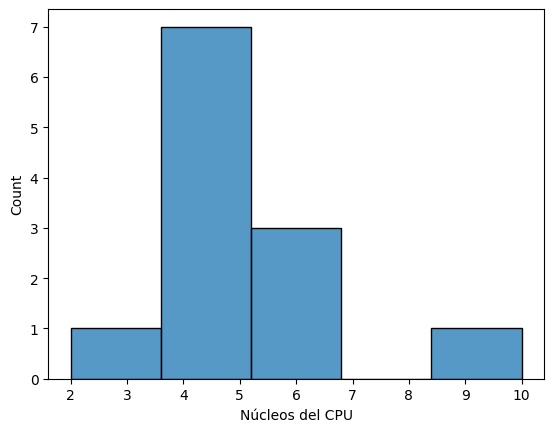

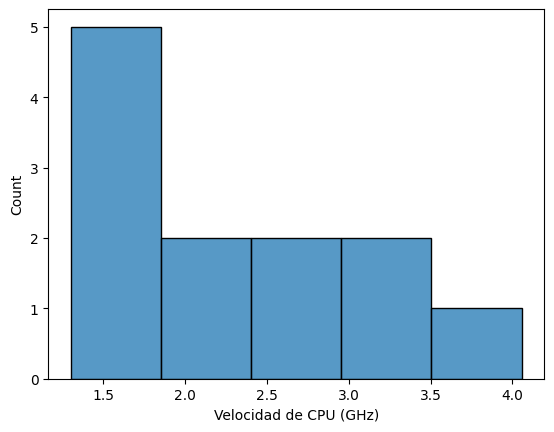

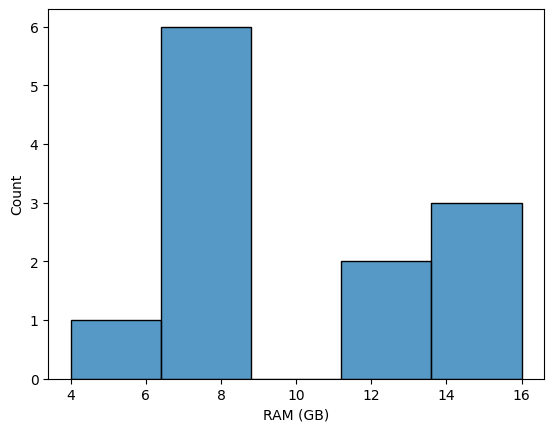

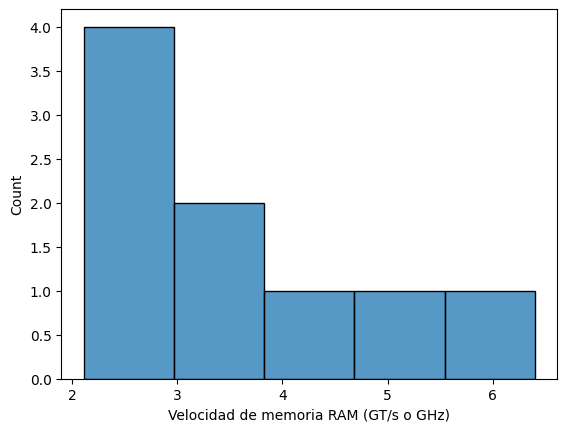

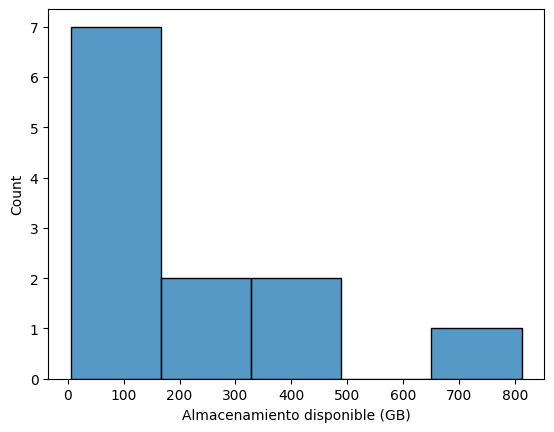

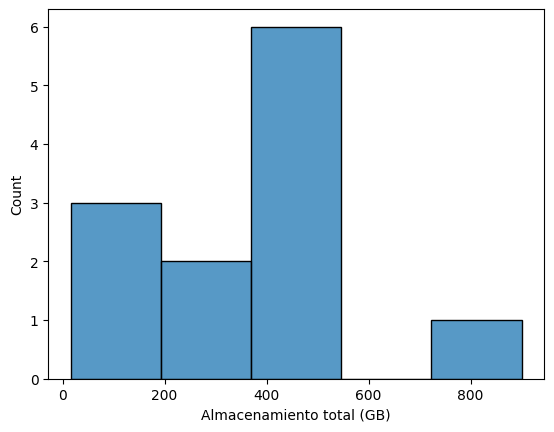

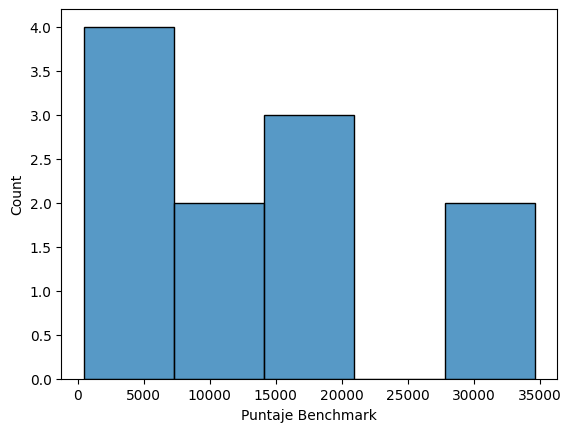

In [40]:
for key in columns_key:
    sns.histplot(df[key])
    plt.show()

# Agrupación y segmentación de datos

## Por sistema operativo

In [42]:
os_summary = df.groupby('Sistema Operativo').agg({
    'Velocidad de CPU (GHz)': 'mean',
    'RAM (GB)': 'mean',
    'Puntaje Benchmark': 'mean'
}).reset_index()
os_summary


,Sistema Operativo,Velocidad de CPU (GHz),RAM (GB),Puntaje Benchmark
0,Linux,2.289000,6.500000,6369.500000
1,Windows,2.242857,11.338911,15476.833333
2,macOS,3.500000,16.000000,34628.000000


## Por tipo de disco o estado de virtualización

In [44]:
disco_summary = df.groupby('Tipo de disco').agg({
    'Almacenamiento total (GB)': 'mean',
    'Puntaje Benchmark': 'mean'
}).reset_index()
disco_summary


,Tipo de disco,Almacenamiento total (GB),Puntaje Benchmark
0,HDD,900.000000,14168.000
1,Micro sd,16.000000,2794.000
2,NVMe,476.000000,13298.000
3,SSD,344.777778,15338.375


# Correlación y rendimiento

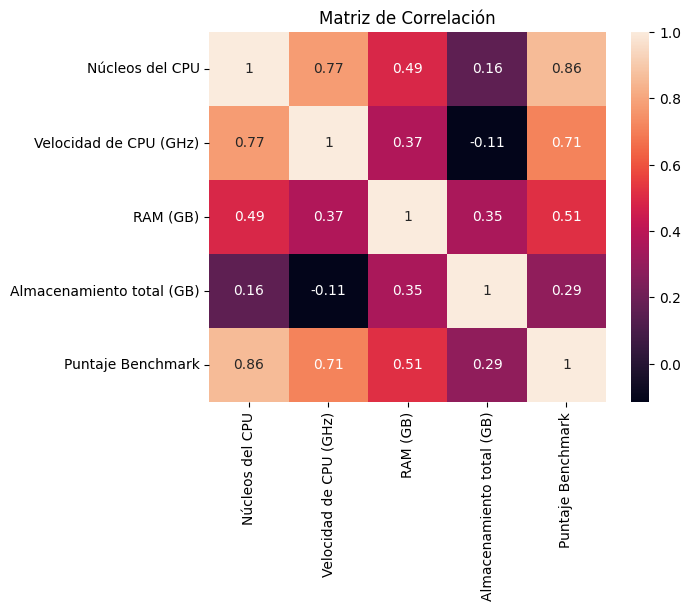

In [45]:
correlaciones = df[['Núcleos del CPU', 'Velocidad de CPU (GHz)', 'RAM (GB)', 'Almacenamiento total (GB)', 'Puntaje Benchmark']].corr()
sns.heatmap(correlaciones, annot=True)
plt.title("Matriz de Correlación")
plt.show()


# Tops

In [48]:
equipos_minimos = df[(df['Núcleos del CPU'] >= 4) & (df['RAM (GB)'] >= 4)]
equipos_minimos


,Marca temporal,Nombre de usuario,Nombre Completo (comenzado por apellidos),Número Telefónico,Sistema Operativo,Versión SO,Modelo de procesador,Arquitectura,Núcleos del CPU,Velocidad de CPU (GHz),RAM (GB),Tipo de memoria RAM,Velocidad de memoria RAM (GT/s o GHz),Almacenamiento disponible (GB),Almacenamiento total (GB),Tipo de disco,Estado de Virtualización,¿Tu laptop cuenta con puerto Ethernet?,¿Cuál es su velocidad?,Puntaje Benchmark
1,2025/03/01 11:43:52 a. m. GMT-6,422055662@pcpuma.acatlan.unam.mx,Baeza Guerrero Roberto,7.122056e+09,Linux,Ubuntu 24.04.1 LTS,AMD Ryzen 5 5500U Readeon Graphics,64 bits,6,4.056,8.000000,DDR4,NaN,24.0000,55,SSD,Habilitada,Sí,1000 Mbps,20148.0
2,2025/03/01 11:48:38 a. m. GMT-6,317134324@pcpuma.acatlan.unam.mx,Peralta Cortés Jorge Alejandro,5.540094e+09,Windows,Microsoft Windows 11 Home Single Language Vers...,Ryzen 5 4600H,64 bits,6,3.000,15.372375,LPDDR4,NaN,105.0000,512,SSD,Habilitada,No,1000 Mbps,NaN
3,2025/03/01 1:16:57 p. m. GMT-6,421057058@pcpuma.acatlan.unam.mx,Méndez Hernández Elías Uriel,9.514676e+09,Windows,10.0.22631,Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz,64 bits,4,1.800,8.000000,DDR4,4.800,30.0000,256,SSD,Habilitada,No pero tengo o puedo conseguir un adaptador,1000 Mbps,7019.0
4,2025/03/01 2:20:56 p. m. GMT-6,422015213@pcpuma.acatlan.unam.mx,Castillo Godinez Oswaldo,5.636417e+09,Windows,10.0.26100,AMD Ryzen 7 3700U with Radeon Vega Mobile Gfx,64 bits,4,2.300,8.000000,DDR4,2.400,277.0000,476,SSD,Habilitada,No,NaN,14534.0
5,2025/03/01 5:20:32 p. m. GMT-6,421078295@pcpuma.acatlan.unam.mx,López Núñez Gustavo Isaac,4.341169e+09,macOS,15.1,Apple M2 Pro,64 bits,10,3.500,16.000000,LPDDR5,6.400,5.2000,500,SSD,No estoy seguro,No,NaN,34628.0
6,2025/03/02 11:07:56 a. m. GMT-6,317071641@pcpuma.acatlan.unam.mx,Huerta Orozco Yago Raúl,5.631144e+09,Windows,Microsoft Windows 11 Home Single Language,11th Gen Intel(R) Core(TM) i5-11400H @ 2.70GHz,64 bits,6,2.700,8.000000,NaN,3.200,70.4323,477,SSD,No estoy seguro,Sí,100 Mbps,31278.0
7,2025/03/02 11:25:56 a. m. GMT-6,316092940@pcpuma.acatlan.unam.mx,Castillo Hernandez Nestor Eithan,NaN,Linux,Raspbian,Arm cortex a72,64 bits,4,1.500,4.000000,LPDDR4,2.400,10.0000,16,Micro sd,Habilitada,Sí,1000 Mbps,2794.0
8,2025/03/02 11:27:47 a. m. GMT-6,421089037@pcpuma.acatlan.unam.mx,Jiménez Pineda Leydi Monserrat,5.582289e+09,Windows,Caption=Microsoft Windows 11 Home Single Langu...,11th Gen Intel® Core™ i5-1155G7,64 bits,4,2.500,16.000000,LPDDR4X,4.267,28.2300,120,SSD,Habilitada,No,100 Mbps,12564.0
9,2025/03/02 11:41:49 a. m. GMT-6,318018669@pcpuma.acatlan.unam.mx,Castro López Cristian Alberto,5.569641e+09,Windows,Windows 11 home single languange 10.0.22631,Intel(R) Core(TM) i5-10210U CPU @ 1.60 GHz,64 bits,4,1.600,12.000000,NaN,2.110,812.0000,900,HDD,Habilitada,Sí,100 Mbps,14168.0
10,2025/03/02 12:09:06 p. m. GMT-6,miguel@acatlan.unam.mx,Alvarado Reyes Jorge Miguel,5.546952e+09,Linux,Debian GNU/Linux 12 (Bookworm),AMD Ryzen 7 3700U with Radeon Vega Mobile Gfx,64 bits,4,2.300,6.700000,DDR4,3.200,391.0000,467,SSD,Habilitada,No pero tengo o puedo conseguir un adaptador,NaN,2060.0
